In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.simplefilter('ignore') # filter some warning messages

In [ ]:
for i in range(2):
    if i==0:
        df = xr.open_dataset('../data/Downscaleddata/surface temp time series for MHW analysis/surface thetao_245_timeseries.nc')
        lab='SSP 245'
    else:
        df = xr.open_dataset('../data/Downscaleddata/surface temp time series for MHW analysis/surface thetao_585_timeseries.nc')
        lab='SSP 585'
    df.close()

    permon = np.full((len(range(2020,2100,10)),len(df.model.values)),np.nan)
    emerg1 = np.full((len(df.model.values)), np.nan)
    emerg2 = np.full((len(df.model.values)), np.nan)
    mhw90 = np.full(len(df.model.values), np.nan)

    plt.figure(figsize=(12,5))
    for m in range(len(df.model.values)):
        modelnm = df.model.values[m]
        tmp = df.thetao[m]
        tmpa = tmp.resample(time='12MS').mean()
        # calculate anomalies, for the perriod 1993-2020
        #clim = tmp.sel(time=slice('1993-01-01','2019-12-31')).groupby('time.year').mean('time',keep_attrs=True)
        #tmpa = tmp.groupby('time.month') - clim
        if m==0:
            allmod = tmpa.values
        else:
            allmod = allmod + tmpa.values

        plt.plot(tmpa.time, tmpa, color='grey', alpha=0.3)

        # baseline
        tmpx = tmpa.sel(time=slice('2010-01-01','2020-12-31'))
        mhw90[m] = np.percentile(tmpx.values, 90)

        d=0 # decade
        emyr1 = 0
        emyr2 = 0
        for yr in range(2020,2100,10):
            tmp2 = tmpa.sel(time=slice(str(yr)+'-01-01',str(yr+9)+'-12-31'))
            a = tmp2>= mhw90[m]
            permon[d,m]=np.round((a.values*1).sum()*100/(10))

            decstd = np.std(tmp2.values)
            decmean = np.mean(tmp2.values)
            if (decmean+decstd >= mhw90[m]) & (emyr1==0):
                emerg1[m]=yr
                emyr1=1
            if (decmean >= mhw90[m]) & (emyr2==0):
                emerg2[m]=yr
                emyr2=1

            d += 1

    # average across models (variables in the data frame)
    allmod = allmod/len(df.model.values)
    plt.plot(tmpa.time, allmod, color='k', alpha=0.9, label=lab+' Ensamble mean')
    plt.axhline(mhw90.mean(), color='tab:blue', alpha=0.9, label='2010-2020 MHW threshold')
    plt.axvline(dt.datetime(int(np.mean(emerg1)),1,1), c='tab:red',label='MHW becomes normal')
    plt.axvline(dt.datetime(int(np.mean(emerg2)),1,1), c='tab:red', ls='--', label='MHW becomes average')
    plt.ylabel('SST anomalies (C)')
    plt.grid(True,alpha=0.3)
    plt.legend(loc=0) #, fontsize='small')
    plt.xlim([df.time[0],df.time[-1]])
    plt.savefig('../figures/mhws/'+lab+'_timeseries_ensemblemean_becomesnormal.png')
    plt.show()

    plt.figure(figsize=(10,4))
    plt.plot(range(2020,2100,10),permon,'+-', color='gray', alpha=0.6)
    plt.plot(range(2020,2100,10),np.mean(permon, axis=1),'o-k', lw=3)
    plt.grid(zorder=0, alpha=0.3)
    plt.ylabel('% of time in decade')
    plt.savefig('../figures/mhws/'+lab+'_decadal_ensemblemean.png')
    plt.show()

    print('mean+std = ', np.mean(emerg1))

    print('mean = ', np.mean(emerg2))

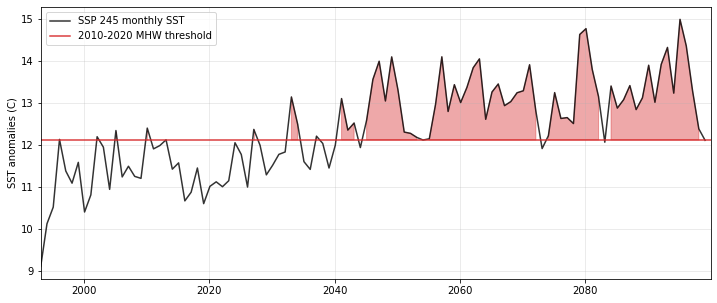

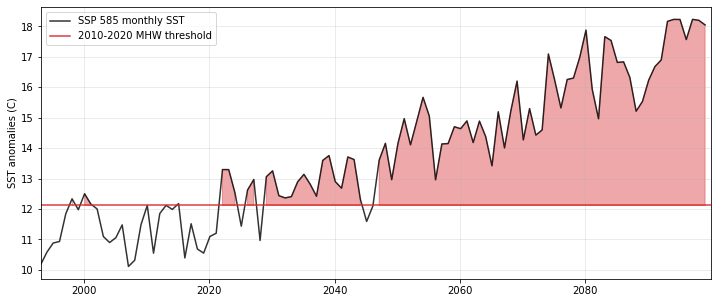

In [2]:
for i in range(2):
    if i==0:
        df = xr.open_dataset('../data/Downscaleddata/surface temp time series for MHW analysis/surface thetao_245_timeseries.nc')
        lab='SSP 245'
    else:
        df = xr.open_dataset('../data/Downscaleddata/surface temp time series for MHW analysis/surface thetao_585_timeseries.nc')
        lab='SSP 585'
    df.close()

    plt.figure(figsize=(12,5))
    m=1 # model
    modelnm = df.model.values[m]
    tmp = df.thetao[m]
    tmpa = tmp.resample(time='12MS').mean()
    # calculate anomalies, for the perriod 1993-2020
    #clim = tmp.sel(time=slice('1993-01-01','2019-12-31')).groupby('time.month').mean('time',keep_attrs=True)
    #tmpa = tmp.groupby('time.month') - clim

    plt.plot(tmpa.time, tmpa, color='k', alpha=0.8, label=lab+' monthly SST')

    tmpx = tmpa.sel(time=slice('2010-01-01','2020-12-31'))
    mhw90 = np.percentile(tmpx.values, 90)
    plt.axhline(mhw90.mean(), color='tab:red', alpha=0.9, label='2010-2020 MHW threshold')
    tmpb = tmpa.where(tmpa>=mhw90, np.nan)
    plt.fill_between(tmpb.time, mhw90, tmpb, color='tab:red', alpha=0.4)
    plt.grid(True, alpha=0.3, zorder=0)
    plt.xlim([df.time[0],df.time[-1]])
    plt.ylabel('SST anomalies (C)')
    plt.legend(loc=0)
    plt.savefig('../figures/mhws/'+lab+'_timeseries_example.png')
    plt.show()

In [3]:
df

<xarray.Dataset>
Dimensions:  (model: 9, time: 1283)
Coordinates:
  * model    (model) object 'CanESM5-CanOE' 'CanESM5-CanOE' ... 'GFDL-ESM4'
  * time     (time) datetime64[ns] 1993-02-15 ... 2099-12-16T12:00:00
Data variables:
    thetao   (model, time) float64 ...